# **Part 1**

In [ ]:
import pystan
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Size of data set: 5856
First 3 values in data set: [30.   3.4  3.2]
Sum of data set: 1441.6838153800093


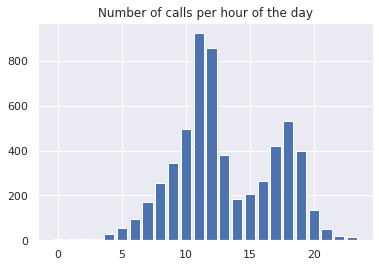

In [ ]:
# Load the data set containing durations between calls arriving at the call center.
# All values are in minutes.
waiting_times_day = np.loadtxt('call-center.csv')
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

# Split the data into 24 separate series, one for each hour of the day
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

# Plot the number of calls per hour
plt.bar(range(24), [len(w) for w in waiting_times_per_hour])
plt.title('Number of calls per hour of the day')
plt.show()

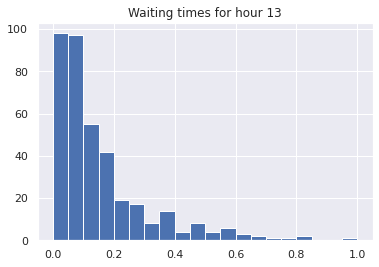

In [ ]:
# Plot histogram of waiting times for hour
hour_index = 13
waiting_times_hour = waiting_times_per_hour[hour_index]
plt.hist(waiting_times_hour, bins=20)
plt.title('Waiting times for hour %i' % hour_index)
plt.show()

In [ ]:
#defining the data dictionary 
data_dictionary_1 = {
    'N': len(waiting_times_hour), 
    'waiting_times': waiting_times_hour,
    'alpha': 1,
    'beta': .25
}

In [ ]:
# This is a partial Stan model. Look up how to define the multinomial
# and dirichlet distributions in your likelihood and prior.

stan_code_1 = '''

data {
    int<lower=1> N;    // number of waiting times logged in our data
    real<lower=0> waiting_times[N]; //waiting times as obtained from the dataset for the 13th hour
    real<lower=0> alpha;   // fixed prior hyperparameter 
    real<lower=0> beta;     // fixed prior hyperparameter
}

parameters {
    real<lower=0> lambda;  // call-rate as a parameter for the likelihood
}

model {
    lambda ~ gamma(alpha,beta); //prior
    for (i in 1:N){
        waiting_times[i] ~ exponential(lambda); //likelihood function
    }
}

'''

stan_model_1 = pystan.StanModel(model_code=stan_code_1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e98eefaa9ac86b62ac3aa3e8ac01c743 NOW.


In [ ]:
stan_simulation_1 = stan_model_1.sampling(data = data_dictionary_1)
print(stan_simulation_1)

Inference for Stan model: anon_model_e98eefaa9ac86b62ac3aa3e8ac01c743.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda   6.35  8.9e-3   0.33   5.72   6.12   6.35   6.57   7.01   1371    1.0
lp__   324.41    0.02   0.72 322.38 324.23 324.68 324.87 324.92   1665    1.0

Samples were drawn using NUTS at Fri Oct 16 21:00:32 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [ ]:
samples_model_1 = stan_simulation_1.extract()

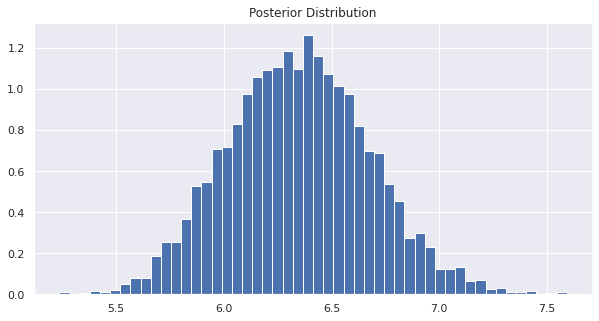

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(samples_model_1['lambda'], bins=50, density= True)
plt.title('Posterior Distribution')
plt.show()

In [ ]:
np.percentile(samples_model_1['lambda'],[1,99])

array([5.63410762, 7.146437  ])

# **Part 2**

In [40]:
data = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])
print(len(data), "data points")

200 data


In [42]:
#defining the data dictionary 
data_dictionary_2 = {
    'N': len(data), 
    'dat': data,
    'alpha': 1.12,  
    'beta': 0.4,
    'mu': 0,
    'nu': 0.054
}

In [46]:
# This is a partial Stan model. Look up how to define the multinomial
# and dirichlet distributions in your likelihood and prior.

stan_code_2 = '''

data {
    int<lower=1> N; // length of data
    real dat[N];  // data
    real<lower=0> alpha;  // fixed prior hyperparameter
    real<lower=0> beta;   // fixed prior hyperparameter
    real<lower=0> mu;   // fixed prior hyperparameter
    real<lower=0> nu;   // fixed prior hyperparameter
}

parameters {
    real mu_1;   // mean
    real<lower=0> sigma2_1; //variance
}

model {
    mu_1 ~ normal(mu, sqrt(sigma2_1/nu));  //prior 1
    sigma2_1 ~ inv_gamma(alpha, beta);   //prior 2
    for(i in 1:N) {
        dat[i] ~ normal(mu_1, sqrt(sigma2_1));  // likelihood function
    }
}

'''

stan_model_2 = pystan.StanModel(model_code=stan_code_2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5fe93abe0b7c4542271c755b9fb8726c NOW.


In [47]:
stan_simulation_2 = stan_model_2.sampling(data = data_dictionary_2)
print(stan_simulation_1)

Inference for Stan model: anon_model_e98eefaa9ac86b62ac3aa3e8ac01c743.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda   6.34  7.9e-3   0.32   5.74   6.12   6.34   6.56   6.99   1628    1.0
lp__   324.44    0.02   0.67  322.5 324.27  324.7 324.88 324.92   1964    1.0

Samples were drawn using NUTS at Sat Oct 17 00:03:44 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [48]:
samples_model_2 = stan_simulation_2.extract()

In [49]:
np.percentile(samples_model_2['mu_1'],[2.5,97.5])

array([2.79978664, 3.32850289])

In [50]:
np.percentile(samples_model_2['sigma2_1'],[2.5,97.5])

array([2.96680463, 4.41193337])

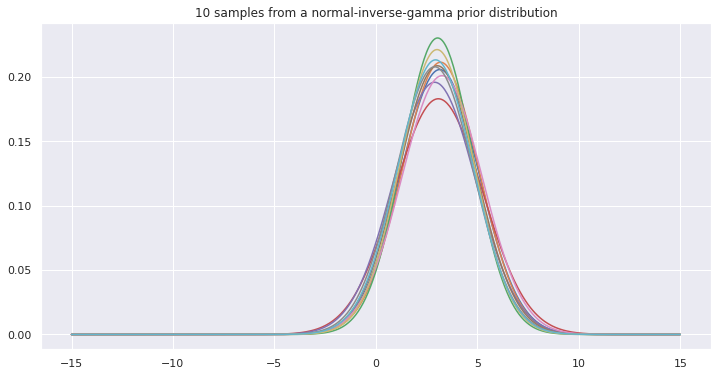

In [54]:
# Generate 10 samples from the posterior
mean_samples = np.random.choice(samples_model_2['mu_1'], 10)
var_samples = np.random.choice(samples_model_2['sigma2_1'], 10)

# Plot the normal distributions corresponding to the samples
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-15, 15, 500)
for i in range(10):
    plot_y = stats.norm.pdf(plot_x, loc=mean_samples[i], scale=np.sqrt(var_samples[i]))
    plt.plot(plot_x, plot_y)
plt.title('10 samples from a normal-inverse-gamma prior distribution')
plt.show()

# **Part 3**